In [1]:
# importing libraries
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

C:\Users\MHuq\AppData\Roaming\Python\Python37\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# loading dataset
outline_border=gpd.read_file('C:\Python\Dashboard\small-20220926/small_bangladesh_geojson_adm0_whole_bangladesh_outline.json')
divisions=gpd.read_file('C:\Python\Dashboard\small-20220926/small_bangladesh_geojson_adm1_8_divisions_bibhags.json')
districts_zillas=gpd.read_file('C:\Python\Dashboard\small-20220926/small_bangladesh_geojson_adm2_64_districts_zillas.json')
thana_upazila=gpd.read_file('C:\Python\Dashboard\small-20220926/small_bangladesh_geojson_adm3_492_upozila.json')
unions=gpd.read_file('C:\Python\Dashboard\small-20220926/small_bangladesh_geojson_adm4_5160_unions_thanas.json')

In [3]:
# border of bangladesh
outline_border.head()

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,date,validOn,validTo,geometry
0,110.307505,12.396584,Bangladesh,BD,None,None,None,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((91.86333 21.60062, 91.84664 21..."


In [4]:
truenat_data=pd.read_csv("\Data\Truenat_location.csv")
truenat_data.head()

,Sl,Implementing_Partner,Site_Name,Division,District,Upazilla,Union,Contact_person,Mobile,Latitude,Longitude
0,1,BRAC,"31 Beded Hospital , Bagbati",Rajshahi,Sirajganj,Sirajgong Sadar,Bagbati,Md. Tuhidul Islam,01722-530351,24.536037,89.617718
1,2,BRAC,Balarhat Brac Office,Rangpur,Rangpur,Mithapukur,Balarhat,Mukul Mia,01728-492293,25.589842,89.357895
2,3,BRAC,Bamunia Peripharal Lab,Rajshahi,Bogura,Gabtoli,Pirgacha,Anarul Islam,01636-704942,24.953420,89.402819
3,4,BRAC,Chilahati P/L,Rangpur,Nilphamari,Domar,Bhogdaburi,Manosh kumar Das,01738-553297,26.243922,88.796592
4,5,BRAC,Chonka Peripharal Lab,Rajshahi,Bogura,Sherpur,Vobanipur,Arif Hossain,01722-217514,24.605775,89.425312


In [6]:
# convert to Geopandas Geodataframe
truenat_gdata = gpd.GeoDataFrame(truenat_data,geometry=gpd.points_from_xy(truenat_data.Longitude, truenat_data.Latitude))
truenat_gdata.head()

,Sl,Implementing_Partner,Site_Name,Division,District,Upazilla,Union,Contact_person,Mobile,Latitude,Longitude,geometry
0,1,BRAC,"31 Beded Hospital , Bagbati",Rajshahi,Sirajganj,Sirajgong Sadar,Bagbati,Md. Tuhidul Islam,01722-530351,24.536037,89.617718,POINT (89.61772 24.53604)
1,2,BRAC,Balarhat Brac Office,Rangpur,Rangpur,Mithapukur,Balarhat,Mukul Mia,01728-492293,25.589842,89.357895,POINT (89.35789 25.58984)
2,3,BRAC,Bamunia Peripharal Lab,Rajshahi,Bogura,Gabtoli,Pirgacha,Anarul Islam,01636-704942,24.953420,89.402819,POINT (89.40282 24.95342)
3,4,BRAC,Chilahati P/L,Rangpur,Nilphamari,Domar,Bhogdaburi,Manosh kumar Das,01738-553297,26.243922,88.796592,POINT (88.79659 26.24392)
4,5,BRAC,Chonka Peripharal Lab,Rajshahi,Bogura,Sherpur,Vobanipur,Arif Hossain,01722-217514,24.605775,89.425312,POINT (89.42531 24.60578)


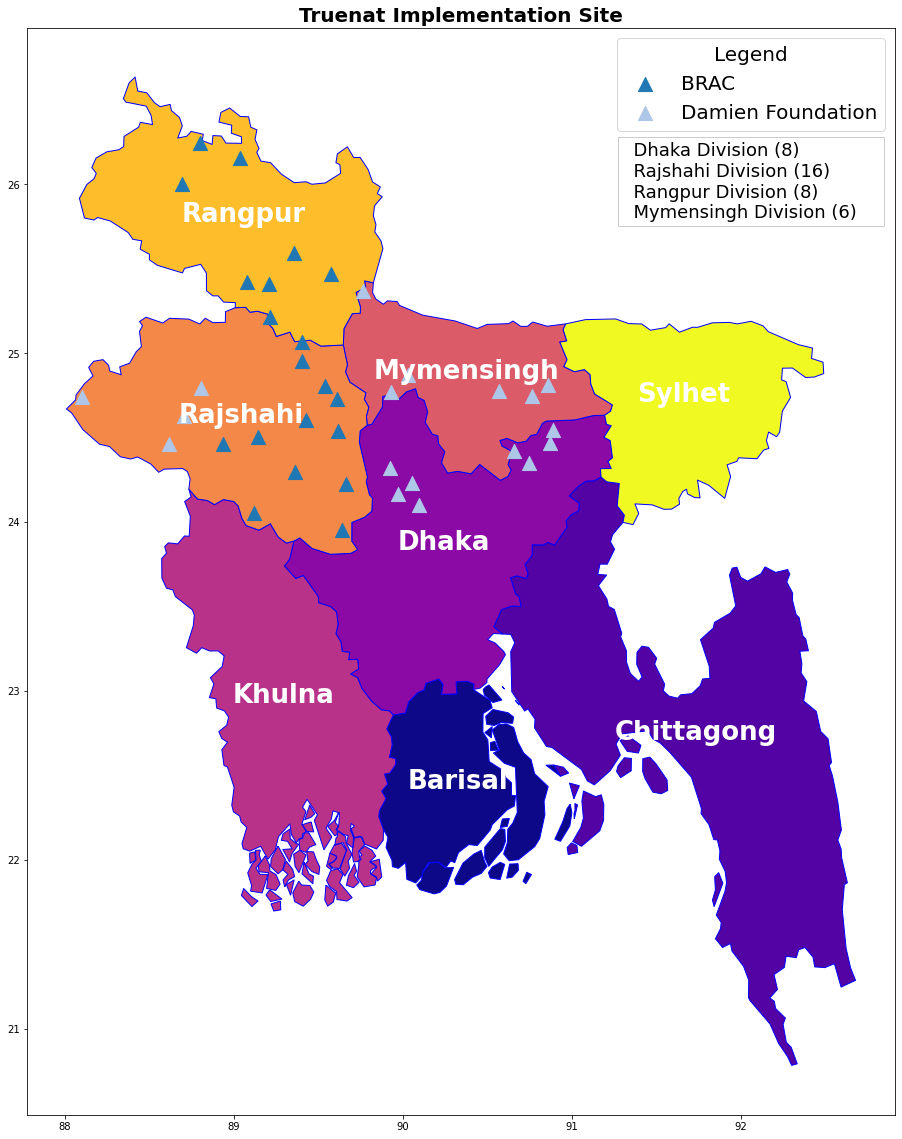

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
# Create a custom color map (you can choose any other colormap you like)
custom_cmap = 'plasma'

# With level
fig, ax = plt.subplots(figsize=(20, 20))

# Update the colormap and facecolor for 'divisions' GeoDataFrame
divisions_plot = divisions.plot(ax=ax, cmap=custom_cmap, edgecolor="Blue", column='ADM1_EN')

# Increase font size for the title and legend
font_size = 20
ax.set_title('Truenat Implementation Site', fontsize=font_size, fontweight='bold', color='Black')

# Group the 'truenat_gdata' GeoDataFrame by "Implementing_Partner" and create a dictionary
# to map each partner to a unique color using 'tab20' colormap.
implementing_partners = truenat_gdata.groupby('Implementing_Partner')
partner_colors = {partner: cm.tab20(i % 18) for i, partner in enumerate(implementing_partners.groups)}

# Iterate through each group and plot their points separately with unique colors
for partner, group in implementing_partners:
    color = partner_colors[partner]
    group.plot(ax=ax, marker='^', markersize=200, color=color, label=partner)

# Increase font size for annotations and set font bold and white color
annotation_font_size = 26
divisions.apply(lambda x: ax.annotate(text=x.ADM1_EN, xy=x.geometry.centroid.coords[0], ha='center', fontsize=annotation_font_size, fontweight='bold', color='white'), axis=1)

# Add a single textbox to display division information
textbox_content = "\n".join([
    "  Dhaka Division (8)" ,
    "  Rajshahi Division (16) ",
    "  Rangpur Division (8) ",
    "  Mymensingh Division (6)    "
])

ax.text(91.3, 25.8, textbox_content, fontsize=18, bbox=dict(facecolor='white', alpha=0.2))

# Create custom legend for the different implementing partners
# Use the legend handles created during the plot iteration
legend_handles, legend_labels = [], []

for handle in ax.get_legend_handles_labels()[0]:
    partner_name = handle.get_label()
    if partner_name in legend_labels:
        legend_handles.append(handle)
        legend_labels.append(legend_labels[partner_name])
    else:
        legend_handles.append(handle)
        legend_labels.append(partner_name)

legend = ax.legend(handles=legend_handles, labels=legend_labels,
                   fontsize=font_size, facecolor='White')

# Set the title for the legend
legend.set_title("Legend", prop={'size': font_size})

# Set the legend text color to black
for text in legend.get_texts():
    text.set_color("black")

plt.show()
